In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

## Free particle in a box 

### GPT4 32K, T = 0.3 solution
In the given example, we are using a finite difference method to solve the Schrödinger equation. The boundary conditions are implicitly set by the size of the Hamiltonian matrix. Specifically, we have a "hard wall" boundary condition, meaning the wavefunction is assumed to be zero at the boundaries. This is because we don't include terms for ψ[i-1] when i=0 and ψ[i+1] when i=N-1 in the Hamiltonian matrix.

This is equivalent to having an infinitely high potential at the boundaries (a particle in a box model), which is why the wavefunction must be zero there. The particle is not allowed to exist outside the box, so the probability of finding the particle there (which is proportional to the square of the wavefunction) must be zero.

However, it's important to note that this is a simplification. In a more realistic scenario, the potential might not be infinite at the boundaries, and the wavefunction would not necessarily be zero. Different boundary conditions could be used depending on the specific physical situation being modeled.

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


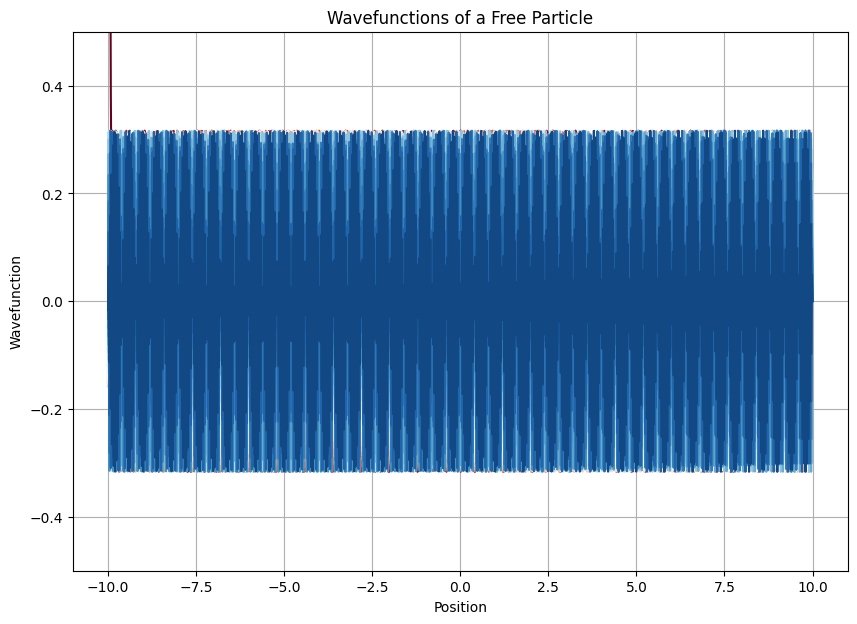

In [38]:
# Constants
hbar = 1.0   # Planck's constant / 2π
m = 1.0      # Particle mass
E = 1.0      # Energy
N = 1000     # Number of grid points
a = -10.0    # x-grid start
b = 10.0     # x-grid end
dx = (b - a) / N

# Create the Hamiltonian matrix
H = np.zeros((N, N))

for i in range(1, N - 1):
    H[i, i] = -2.0
    H[i, i - 1] = 1.0
    H[i, i + 1] = 1.0

H = -hbar**2 / (2.0 * m * dx**2) * H

# Solve for eigenvalues (energies) and eigenvectors (wavefunctions)
E, psi = np.linalg.eigh(H)

# Normalize the wavefunctions
psi = psi / np.sqrt(dx)

# Plot the first few states
plt.figure(figsize=(10, 7))
nloop = 1000
step=50
for i in range(0, nloop, step):
    print(i)
    if psi[1, i] < 0:   # Flip the wavefunctions if they are upside down
        plt.plot(np.linspace(a, b, N), -psi[:, i], c=cm.RdBu(i/nloop))
    else:
        plt.plot(np.linspace(a, b, N), psi[:, i], c=cm.RdBu(i/nloop))

plt.title("Wavefunctions of a Free Particle")
plt.xlabel("Position")
plt.ylabel("Wavefunction")
plt.grid(True)
plt.ylim(-1/2,1/2)
plt.show()